# Neural networks for regression and classification tasks with TensorFlow

ANNs are used for a wide range of tasks, including regression and classification. In this guide, we eill explore how to build and train ANNs using TensorFlow.

Neural networks consist of layers of interconnected nodes, or neurons, which transform input data into output predictions. The main components of a neural network include:

- **Input layer**: The layer that receives the input data.
- **Hidden layers**: Intermediate layers that transform inputs through learned weights and biases.
- **Output layer**: The final layer that outputs predictions.

#### Steps in building neural networks with TensorFlow
1. Define the model architecture: Choose the number of layers and neurons.
2. Compile the model: Specify the optimizer, loss function, and metrics.
3. Train the model: Use training data to learn weights.
4. Evaluate the model: Assess performance on test data.
5. Make predictions: Use the model to predict new data.
6. Saving the model
7. Loading the model

In this guide, we will build of neural networks (FFNN) for two types of tasks:
1. **Regression**: Used for predicting continuous values.
2. **Classification**: Used for classifying data into discrete categories.

A feedforward neural network (FFNN) is a type of artificial neural networks. It consists of layers of neurons, where each layer is connected only to the next one, and there are no loops or cycles.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 1. Neural network for regression
In this section, we'll build a neural network to predict house prices using the California housing dataset. This dataset contains features related to housing prices in California. It includes attributes like median income, housing age, and average rooms per household, among others.

In [2]:
# Load the Boston housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 1.1: Define the model architecture

In [3]:
# Define a simple feedforward neural network model for regression
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Another hidden layer with 32 neurons
model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (for regression)

**Explanation:**
- **Initializing the sequential model**
    - **`Sequential()`**: This creates a linear stack of layers, meaning each layer has one input tensor and one output tensor. We can add layers one by one, and the output of each layer will be the input to the next layer.
    - While not covered here, these are alternative methods for more complex models where layers can have multiple inputs and outputs.

- **Input layer**: The input layer is where the data enters the neural network.
    - Syntax: `InputLayer(input_shape=(number_of_features,))`
    - The `input_shape` parameter is typically a tuple specifying the number of features in the input data. For tabular data, it corresponds to the number of features (columns) in the dataset.
    - The input layer doesn’t contain trainable parameters such as weights or biases; it just defines the shape of the input data.
    - In our example:
        - **`InputLayer(input_shape=(X_train.shape[1],))`**: This specifies the shape of the input data. `X_train.shape[1]` refers to the number of features in our input data. For instance, if `X_train` has 10 features, the input layer shape will be `(10,)`. 

- **Hidden layers**: Hidden layers are used to learn and represent complex patterns in the data.
    - Syntax: `Dense(units, activation='activation_function')`
    - Dense layers: The most common type of layer in FFNNs, where each neuron in a dense (fully connected) layer receives input from all neurons in the previous layer. Each layer transforms the input data through a set of weights and biases.
    - `units`: Number of neurons in the layer.
    - `activation`: An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network. Typically, a differentiable nonlinear activation function is used in the hidden layers of a neural network. This allows the model to learn more complex functions than a network trained using a linear activation function.
    - In our example:
        - **`Dense(64, activation='relu')`**: This adds a dense (fully connected) layer with 64 neurons. Each neuron in this layer will apply a ReLU activation function, which introduces non-linearity and helps the network learn complex patterns.
        - **`Dense(32, activation='relu')`**: Another dense layer with 32 neurons and ReLU activation. Adding more hidden layers can help the model learn more complex representations of the data.

- **Output layer**: The output layer provides the final predictions of the network.
    - Syntax for regression: `Dense(1, activation='activation_function')` (single neuron without activation function)
    - 1 neuron: For regression tasks, the output layer typically has a single neuron to predict a continuous value.
    - If activation function is not specified, a linear activation used by default.
    - In our example:
        - **`Dense(1, activation='linear')`**: The final output layer with a single neuron. Since this is a regression task, this layer has linear activation function (or can use a linear activation by default) which means the output is a linear combination of inputs. This is suitable for predicting continuous values.

**Hyperparameters in this step:**
- **Number of layers and neurons**: The number of hidden layers and the number of neurons per layer are crucial hyperparameters. More neurons and layers allow the network to learn more complex patterns but also increase computational complexity and risk of overfitting. These are chosen based on the complexity of the problem and can be adjusted based on experimentation.
- **Activation function for hidden layer**: We usually will use non-linear activation function in hidden layers since it helps extracting complex relationships. Common activation functions in hidden layers include:
    - ReLU ('`relu`'): Often used in hidden layers. It helps to mitigate the vanishing gradient problem by allowing only positive values to pass through. It helps introduce non-linearity into the model, allowing it to learn complex relationships.
- **Activation function for output layer**:
    - Linear activation ('`linear`' - default): For regression tasks, where we want to predict continuous values.
    - Softmax ('`softmax`'- logistic function): For multi-class classification tasks, where we want to output a probability distribution over classes.
    - Sigmoid ('`sigmoid`'): Used primarily for binary classification.
    - Tanh ('`tanh`'): Similar to sigmoid but output is zero-centered.

### Step 1.2: Compile the model
Compiling a model is a crucial step in defining how a neural network will learn from the data. It involves specifying the optimizer, loss function, and metrics, which together determine the model's training behavior.

**General syntax:** `model.compile(optimizer='optimizer_name', loss='loss_function', metrics=['list_of_metrics'])`

In [4]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

**Hyperparameters in this step:**
- **Optimizer**: The optimizer determines how the model's weights are updated based on the loss function's output. Each optimizer has hyperparameters like the learning rate and momentum, which can be tuned for better performance. Common Optimizers:
    - `SGD`': A traditional optimization algorithm that updates the model parameters based on the gradient of the loss function with respect to each parameter. SGD might be preferable if we need more control over the optimization process or are fine-tuning a model.
        - Syntax with parameters: `SGD(learning_rate=0.01, momentum=0.9)`
            - Learning rate: Determines the step size at each iteration while moving toward a minimum of the loss function.
            - Momentum: Used to accelerate SGD in the relevant direction and dampen oscillations.
    - `Adam`': A popular optimizer that adapts the learning rate for each parameter, combining the benefits of AdaGrad and RMSProp.
        - Syntax with parameters: `Adam(learning_rate=0.001)`
- **Loss function**: The loss function measures how well the model's predictions match the target values. The goal during training is to minimize this loss. Common loss functions for regression:
    - Mean squared error ('mean_squared_error'): Measures the average of the squares of the errors, suitable for regression tasks. It penalizes larger errors more than smaller ones.
    - Mean absolute error ('mean_absolute_error'): Measures the average magnitude of errors without considering their direction, providing a more robust metric to outliers.
    - Huber loss: Combines the properties of MSE and MAE, less sensitive to outliers than MSE.
- **Metrics**: Metrics are used to evaluate the performance of the model during training and testing. Metrics provide a means to evaluate the model’s performance beyond the loss function. For regression tasks, MAE or MSE are commonly used.

### Step 1.3: Train the model
Training a neural network involves feeding data into the model, adjusting the model's weights through backpropagation, and iteratively minimizing the loss function. This is done using the `model.fit()` method in Keras.

**General syntax:**

`model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size_value, validation_split=validation_split_ratio)`

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
413/413 [==============================] - 3s 4ms/step - loss: 0.8040 - mae: 0.6201 - val_loss: 0.5208 - val_mae: 0.4947
Epoch 2/20
413/413 [==============================] - 1s 3ms/step - loss: 0.4621 - mae: 0.4610 - val_loss: 0.4153 - val_mae: 0.4570
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3765 - mae: 0.4370 - val_loss: 0.4009 - val_mae: 0.4429
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3648 - mae: 0.4257 - val_loss: 0.4207 - val_mae: 0.4445
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3473 - mae: 0.4177 - val_loss: 0.3802 - val_mae: 0.4393
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3346 - mae: 0.4090 - val_loss: 0.3670 - val_mae: 0.4236
Epoch 7/20
413/413 [==============================] - 1s 3ms/step - loss: 0.3314 - mae: 0.4025 - val_loss: 0.3646 - val_mae: 0.4235
Epoch 8/20
413/413 [==============================] - 1s 3ms/step - loss: 0.

**Components and hyperparameters in this step:**

- **Input data**: These inputs are required for training the model to learn the mapping from inputs to outputs.
   - `X_train`: The feature matrix for training data.
   - `y_train`: The target vector for training data.
- **Epochs**: The number of times the entire training dataset is passed through the model. More epochs allow the model to learn better representations from the data but can also lead to overfitting if too high. Commonly used values range from 10 to 100 or more, depending on the problem complexity and dataset size.
    - In our example, the model will go through the entire dataset 20 times (`epochs=20`).
- **Batch size**: The number of samples processed before the model's internal parameters are updated. Smaller batch sizes offer a regularization effect and lower generalization error but can increase training time. Larger batch sizes lead to faster computation but might result in worse generalization. Common batch sizes include 16, 32, 64, and 128.
    - In our example, the model will update its weights after every 32 samples (`batch_size=32`).
- **Validation split**: Fraction of the training data to be used as validation data. It allows the model to be evaluated on unseen data after each epoch, providing a measure of how well the model generalizes. Common values range from 0.1 to 0.3. A higher split gives a more accurate picture but reduces the amount of data available for training.
    - In our example, 20% of the training data will be used for validation to monitor the model's performance on unseen data (`validation_split=0.2`).
- **Additional parameters**:
    - **Shuffling**: Whether to shuffle the training data before each epoch. Shuffling helps improve model generalization by preventing the model from learning any unintended order from the dataset.
         - Syntax: `shuffle=True` (default)
   - **Callbacks**: List of callback instances applied during training. They are custom functions or objects that we can pass to the method to perform specific actions at different stages of the training process. They offer a flexible way to monitor, control, and modify the training behavior.
     - Syntax: `callbacks=[list_of_callbacks]`
     - TensorFlow provides several built-in callbacks to cover common use cases:
        - `ModelCheckpoint`: Save the model at specified intervals.
        - `EarlyStopping`: Stop training if validation loss doesn't improve.
        - `ReduceLROnPlateau`: Reduce learning rate when validation loss plateaus.
        - `TensorBoard`: Write logs to TensorBoard for visualization.
        - `LearningRateScheduler`: Schedule learning rate according to a function.
    - **Verbose** (int): Controls the verbosity of the training process. 0 for silent, 1 for progress bar, and 2 for one line per epoch.

##### Plot training metrics
When we train a model with `model.fit()`, it returns a `history` object, which contains a `history` attribute. This attribute is a dictionary where the keys are the names of the metrics specified during compilation and the values are lists of metric values recorded at the end of each epoch.

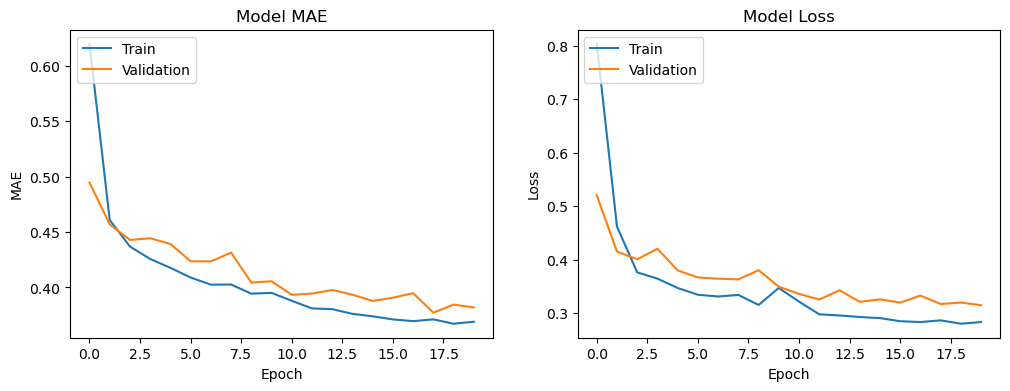

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Step 1.4: Evaluate the model
After training, evaluate the model using test data. This provides an indication of how well the model generalizes to new, unseen data. The metrics evaluated are the same as those specified during model compilation with `model.compile`. The output will be the calculated loss value on the test dataset.

In [7]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")

129/129 [==============================] - 0s 2ms/step - loss: 0.3012 - mae: 0.3730
Test loss: [0.30123254656791687, 0.37297651171684265]


**Components and hyperparameters in this step:**

- **Input data**
    - **`X_test`:** The feature matrix for test data.
    - **`y_test`:** The true target values for the test data.
- **Additional parameters**:
   - **`batch_size`:** Number of samples per evaluation step. In default, it uses the batch size defined during training or the entire dataset if not specified. A larger batch size may speed up evaluation but can lead to memory issues with very large datasets.
   - **`verbose`:** Level of verbosity for logging. The options are `0` (silent), `1` (progress bar), `2` (one line per epoch), while the default is `1`.

If the test loss is significantly higher than the training loss, the model may have overfitted the training data.

### Step 1.5: Make predictions
Use the trained model to predict new data. In regression tasks, the model generates continuous outputs.

In [8]:
# Make predictions
predictions = model.predict(X_test)
print("Predictions:\n", predictions[:5])

129/129 [==============================] - 0s 2ms/step
Predictions:
 [[0.43465  ]
 [1.4989375]
 [4.6834807]
 [2.6295967]
 [2.9933033]]


### Step 1.6: Saving the model
To save and load models in TensorFlow, we can use two main formats: the `SavedModel` format and the `HDF5` format. Each format has its own use cases and advantages.

* The `SavedModel` format is TensorFlow’s default format for saving models. It includes the complete architecture, weights, and training configuration. It is suitable for TensorFlow deployments and serving. It includes everything needed to resume training, including optimizer states and custom objects.
* The `HDF5` format is a more lightweight and flexible format used for saving models. It is convenient for sharing models as a single file. It’s compatible with various tools, but does not include the optimizer configuration.

In [9]:
# Save the model in SavedModel format
model.save("regression_model", save_format="tf")
# Save the model in HDF5 format
model.save("regression_model.h5")

INFO:tensorflow:Assets written to: regression_model\assets


INFO:tensorflow:Assets written to: regression_model\assets


**`SavedModel` format:** It saves the architecture, weights, optimizer state, and even custom objects or layers. It can be loaded in TensorFlow Serving and deployed for inference in different environments.
- `model.save(filepath, save_format="tf")`:This method saves the entire model to the specified path.
- `save_format`: Specifies the format to save the model in. The default `save_format` is `"tf"`, which stands for TensorFlow’s SavedModel format. This format saves the model as a directory containing all necessary files to load the model later.

**`HDF5` format:** Everything is stored in one file, making it easy to manage.
- `model.save(filepath)`:** Saves the model in HDF5 format if the filepath ends with `.h5` or `.hdf5`.
- HDF5 format: Saves the model architecture, weights, and training configuration in a single file.

### Step 1.7: Loading the model

In [10]:
# Load the model from SavedModel format
regression_model = load_model("regression_model")
# Check the model with summary method
regression_model.summary()

# Load the model from HDF5 format
regression_model = load_model("regression_model.h5")
print('\n')
# Check the model with summary method
regression_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (No

- `loaded_model.summary()`: Prints a summary of the model architecture, showing the layers, shapes, and number of parameters.

***Output breakdown***
1. Model: "sequential" - This indicates that the model is a sequential model, meaning that layers are stacked one after another in a linear fashion without any branching or merging paths.
2. Layer details:
   - Dense layers: Each row in the table represents a layer in our model. In this example, you have three dense layers.
   - Layer (type):
     - **`dense` (Dense):** The first layer is a dense layer, which is a fully connected layer.
     - **`dense_1` (Dense):** The second layer is another dense layer.
     - **`dense_2` (Dense):** The third layer is also a dense layer, serving as the output layer.
   - Output shape:
     - **`(None, 64)`:** The output shape of the first layer is `(None, 64)`, where `None` indicates the batch size, which can vary. The `64` is the number of neurons in this layer.
     - **`(None, 32)`:** The output shape of the second layer is `(None, 32)`, meaning this layer has 32 neurons.
     - **`(None, 1)`:** The output shape of the third layer is `(None, 1)`, which is the output layer with 1 neuron, suitable for regression tasks that predict a single continuous value.
3. Param # (parameters):
   - **`576`:** The first dense layer has 576 parameters. This includes weights and biases. For a dense layer, the number of parameters is calculated as `(input features + 1) * number of neurons`. Here, the input is 9 (as deduced from 576/64 - 1 for the bias), giving us `9 * 64 + 64` for the weights and biases.
   - **`2080`:** The second dense layer has 2080 parameters. The number of parameters is `(64 + 1) * 32`, considering 64 inputs and biases for 32 neurons.
   - **`33`:** The third dense layer has 33 parameters, calculated as `(32 + 1) * 1`, where 32 is the number of inputs from the previous layer and 1 is for the bias.
4. Total params: 2,689 - This is the sum of all parameters across all layers, including weights and biases.
5. Trainable params: 2,689 - These are parameters that the model learns during training. In this case, all parameters are trainable.
6. Non-trainable params: 0 - These would be parameters that are fixed and not updated during training. In our model, there are none.

## 2. Classification with Iris dataset
In this section, we will build a neural network to classify iris flowers into one of three species using the Iris dataset. This dataset consists of measurements of iris flowers. It includes features like sepal length, sepal width, petal length, and petal width.

In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In classification tasks, labels are categorical. Neural networks typically require numerical input, and one-hot encoding is a way to convert categorical labels into a binary matrix format that the network can process.

### Step 2.1: Define the model architecture
Use the Sequential API to build a simple feedforward neural network for classification.

In [12]:
# Define a simple feedforward neural network model for classification
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Another hidden layer with 32 neurons
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax activation

**Explanation:**
- **Initializing the sequential model**
    - **`models.Sequential()`**: Creates a linear stack of layers, allowing us to build the model layer by layer.

- **Input layer**: The input layer receives the data.
    - Similar to regression, this layer defines the input data shape and passes it to the hidden layers.
    - In our example:
        - **`layers.InputLayer(input_shape=(X_train.shape[1],))`**: Specifies the input shape, similar to the regression task. The input shape here is based on the number of features in the training data.

- **Hidden layers**: These layers extract features and learn patterns from the data.
    - **Dense layers**: Provide a fully connected architecture for feature learning.
    - **Neurons and activation**: Same as in the regression model, these layers use ReLU activation to introduce non-linearity and allow the model to learn complex patterns.
    - In our example:
        - **`layers.Dense(64, activation='relu')`**: Adds a dense layer with 64 neurons and ReLU activation function. This helps the model learn and represent features from the input data.
        - **`layers.Dense(32, activation='relu')`**: Another dense layer with 32 neurons and ReLU activation. This layer further processes the data from the previous layer.

- **Output layer**: The output layer provides class probabilities.
    - Syntax for classification: `layers.Dense(number_of_classes, activation='softmax')`
    - **Number of neurons**: The number of neurons equals the number of classes in the dataset. For example, if classifying into three categories, there will be 3 neurons.
    - **`activation='softmax'`**: Converts raw scores into probabilities, making them suitable for classification tasks. The sum of probabilities across all classes will be 1.
    - In our example:
        - **`layers.Dense(y_train.shape[1], activation='softmax')`**: The output layer where `y_train.shape[1]` represents the number of classes. The `softmax` activation function converts the output to a probability distribution over the classes, making it suitable for classification.

### Step 2.2: Compile the model
Specify the optimizer, loss function, and metrics.

In [13]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

**Hyperparameters in this step:**
- **Loss function**: Common loss functions for classification:
    - Categorical crossentropy ('categorical_crossentropy'): Used when there are multiple classes (multi-class classification) and the target data is one-hot encoded.
    - Binary crossentropy ('binary_crossentropy'): Used for binary classification tasks.
    - Sparse categorical crossentropy ('sparse_categorical_crossentropy'): Used for multi-class classification with integer labels instead of one-hot encoding.
- **Metrics**: For classification tasks, accuracy is often used, but other metrics like precision and recall might be needed for imbalanced datasets. We should pick metrics that best capture the model's performance for your specific application.
    
### Step 2.3: Train the model
Train the model using the training data.

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 1s 61ms/step - loss: 1.1696 - accuracy: 0.3438 - val_loss: 1.1518 - val_accuracy: 0.2500
Epoch 2/20
6/6 [==============================] - 0s 15ms/step - loss: 1.1534 - accuracy: 0.3438 - val_loss: 1.1366 - val_accuracy: 0.2500
Epoch 3/20
6/6 [==============================] - 0s 12ms/step - loss: 1.1327 - accuracy: 0.3438 - val_loss: 1.1176 - val_accuracy: 0.2500
Epoch 4/20
6/6 [==============================] - 0s 12ms/step - loss: 1.1083 - accuracy: 0.3646 - val_loss: 1.0991 - val_accuracy: 0.2917
Epoch 5/20
6/6 [==============================] - 0s 11ms/step - loss: 1.0864 - accuracy: 0.4688 - val_loss: 1.0810 - val_accuracy: 0.3750
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 1.0645 - accuracy: 0.6354 - val_loss: 1.0653 - val_accuracy: 0.4167
Epoch 7/20
6/6 [==============================] - 0s 12ms/step - loss: 1.0438 - accuracy: 0.6875 - val_loss: 1.0509 - val_accuracy: 0.5000
Epoch 8/20
6/6 [===========

**Hyperparameters in this step:**
The concepts covered in the regression section also apply to classification tasks. However, there are a few additional considerations:
- **Class imbalance** (dict): Handling imbalanced datasets where some classes are more frequent than others. We can adjust the `class_weight` parameter in `fit()` to give different weights to classes, ensuring all classes contribute equally to the loss.
   - Syntax:
   `model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size_value, validation_split=validation_split_ratio), class_weight={class_index: weight_value}`
   
##### Plot training metrics

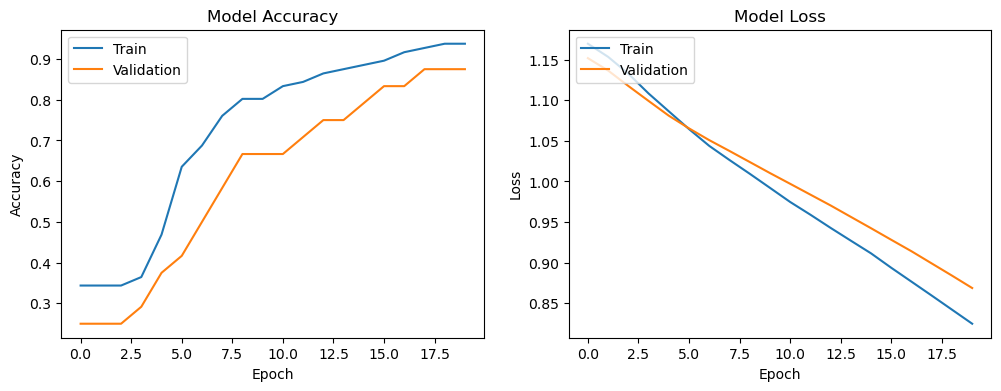

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Step 2.4: Evaluate the model
Assess the performance of the model on the test data. In classification tasks, evaluation not only involves computing the loss but also assessing metrics such as accuracy.

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 [==============================] - 0s 30ms/step - loss: 0.8283 - accuracy: 0.9333
Test loss: 0.828315794467926, Test accuracy: 0.9333333373069763


If additional metrics were specified during model compilation (e.g., `precision`, `recall`), they will be returned in the same order as specified.

### Step 2.5: Make predictions
Use the trained model to make predictions on new data. In classification tasks, the model outputs probabilities for each class, allowing us to determine the most likely class for each input sample.

In [17]:
# Make predictions
predictions = model.predict(X_test)
print("Predictions:\n", np.argmax(predictions, axis=1)[:5])

1/1 [==============================] - 0s 105ms/step
Predictions:
 [1 0 2 2 1]


The output from a classification model (when using a softmax activation function) is an array of probabilities for each class. Each element in this array represents the model's estimate of the likelihood that the input belongs to a particular class. We use `np.argmax` to find the index of the maximum value along a specified axis. In this case, the axis is `1`, which means we are looking for the index of the highest probability in each row (i.e., for each sample). The index with the highest probability corresponds to the class the model predicts the input sample most likely belongs to. Thus, `np.argmax` effectively translates the array of probabilities into a discrete class label.

### Step 2.6: Saving the model

In [18]:
# Save the model in SavedModel format
model.save("classification_model", save_format="tf")
# Save the model in HDF5 format
model.save("classification_model.h5")

INFO:tensorflow:Assets written to: classification_model\assets


INFO:tensorflow:Assets written to: classification_model\assets


### Step 2.7: Loading the model

In [19]:
# Load the model from SavedModel format
regression_model = load_model("classification_model")
# Check the model with summary method
regression_model.summary()

# Load the model from HDF5 format
regression_model = load_model("classification_model.h5")
print('\n')
# Check the model with summary method
regression_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)            